# Fashion Trend Forcasting

In this Data Science project, we work with a dataset crawled from the [Amazon Men's Clothing](https://www.amazon.com/Men-Clothing/b?ie=UTF8&node=1040658) website. Our ultimate goal is when given a new product unreleased on the platform, we will be able to forecast its **total rating** and **weighted rating**.
In order to accomplish this, our project will go through these phases:

1. 

## Import Libraries and Read Data

In [1]:
# Libraries to manipulate data
import numpy as np
import pandas as pd
import json

# Modules, classes, and methods from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from pyampute.exploration.md_patterns import mdPatterns
from pyampute.exploration.mcar_statistical_tests import MCARTest

# Others
import matplotlib.pyplot as plt
import joblib

## Read the Dataset and Split it into Train Set and Test Set

In [2]:
# Read the data from the json file
data_path = "../data/raw/fashion_products.json"
with open(data_path) as f:
    data = json.load(f)

# Normalize the data and create a dataframe
df = pd.json_normalize(data)
df.head()

,title,price_min,price_max,rating_total,rating_percent,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,...,product_details.Sole material,product_details.Water resistance level,product_details.Sleeve type,product_details.Inseam,product_details.Shaft height,product_details.Pocket style,product_details.Shaft circumference,product_details.Inner material,product_details.Material,product_details.Item type name
0,adidas Men's Athletic Cushioned Crew Socks wit...,13.99,13.99,42763,"[79, 12, 5, 2, 2]","[Black/Aluminum 2, Heather Grey/Black, White/B...",Cushioned in the foot for comfort and durabili...,"97% Polyester, 3% Spandex",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nike Performance Cushion Crew Socks with Band ...,28.22,37.00,8619,"[79, 10, 5, 2, 5]","[Black/White, White/Black]",Reinforced heel and toe for enhanced durabilit...,76% Cotton/21% Nylon/2% Spandex/1% Polyester,Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Thermajohn Long Johns Thermal Underwear for Me...,25.49,31.99,52418,"[76, 14, 5, 2, 3]","[Black, Charcoal, Grey, Navy, White, Christmas...",Heat Retention: When it comes to warmth and ev...,"92% Polyester, 8% Spandex",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Calvin Klein Men's Cotton Stretch 7-Pack Boxer...,54.05,76.53,12714,"[75, 12, 6, 3, 6]","[2 Blue Shadow, 2 White, 2 Black, 1 Cobalt Wat...","COTTON STRETCH: Spun in pure, premium cotton y...","95% Cotton, 5% Elastane",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Hanes Men's Hoodie, EcoSmart Fleece Hoodie, Ho...",11.46,11.46,176801,"[72, 15, 7, 3, 4]","[Army Brown, Ash, Black, Cardinal, Charcoal He...",FLEECE TO FEEL GOOD ABOUT - Hanes EcoSmart men...,"50% Cotton, 50% Polyester",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   title                                   4690 non-null   object 
 1   price_min                               4690 non-null   float64
 2   price_max                               4690 non-null   float64
 3   rating_total                            4690 non-null   int64  
 4   rating_percent                          4580 non-null   object 
 5   variants                                4690 non-null   object 
 6   product_about                           4690 non-null   object 
 7   product_details.Fabric type             4526 non-null   object 
 8   product_details.Care instructions       4449 non-null   object 
 9   product_details.Origin                  4049 non-null   object 
 10  product_details.Fit type                146 non-null    obje

- By observing basic information of the data using the `.info()` method, we can see that there are many columns missing very large proportion of data.

In [4]:
# # NOTICE: WE ONLY RUN THIS PIECE OF CODE 1 TIME. PLEASE DON'T UNCOMMENT
# # CHÚ Ý: ĐỪNG THÁO COMMENT ĐOẠN CODE NÀY

# # Sample 80% of the data for training and 20% for testing
# train, test = train_test_split(df, test_size=0.2)

# # Save the train and test data
# train.to_csv("../data/raw/train.csv", index=False)
# test.to_csv("../data/raw/test.csv", index=False)

## Data Preparation

In [5]:
# Read the train set
train_df = pd.read_csv("../data/raw/train.csv")

# Inspect the train set
train_df.head()

,title,price_min,price_max,rating_total,rating_percent,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,...,product_details.Sole material,product_details.Water resistance level,product_details.Sleeve type,product_details.Inseam,product_details.Shaft height,product_details.Pocket style,product_details.Shaft circumference,product_details.Inner material,product_details.Material,product_details.Item type name
0,THE NORTH FACE Men's Canyonlands Hoodie,99.99,100.00,3,"[63, 0, 37, 0, 0]","['Algae Blue Heather', 'Earthen Copper Heather...",ADVENTURE READY. The Men's Canyonlands Hoodie ...,"96% Recycled Polyester, 4% Elastane Fleece",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Under Armour Men's Fleece Twist Quarter Zip,41.98,60.00,107,"[78, 12, 8, 0, 3]","['(001) Black / / Black', '(012) Pitch Gray / ...","Armour Fleece is light, breathable & stretchy ...",100% Polyester,Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"G Gradual Men's Sweatpants Open Bottom, Workou...",25.99,25.99,1869,"[63, 19, 9, 4, 5]","['01-black', '01-grey', '02-black', '02-black ...",Mesh Material and Performance: The mens sweatp...,"95% Polyester, 5% Spandex",Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Elastic Bottom Baggy Sweatpants for Men, Worko...",29.99,29.99,2888,"[67, 16, 8, 3, 5]","['Black', 'Charcoal', 'Grey', 'Navy', 'Brown',...",Unbeatable All-Day Comfort - Experience the lu...,100% Polyester,Machine Wash,Imported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Winterlace 24 Pairs Cotton Crew Socks, Mens Wo...",33.99,33.99,1674,"[63, 13, 11, 5, 9]","['Assorted (White/Black/Gray)', 'Black', 'Blac...",COTTON CREW SOCKS : Crafted from a comfortable...,"80% Cotton, 18% Polyester, 2% Spandex",Machine Wash,China,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

#### Handle Missing Data

In [6]:
# We will drop columns with more than 30% missing values.
null_percents = train_df.isnull().sum() / len(train_df) * 100
null_percents

title                                       0.000000
price_min                                   0.000000
price_max                                   0.000000
rating_total                                0.000000
rating_percent                              2.345416
variants                                    0.000000
product_about                               1.305970
product_details.Fabric type                 3.624733
product_details.Care instructions           5.010661
product_details.Origin                     13.619403
product_details.Fit type                   96.934968
product_details.Pattern                    86.860341
product_details.Closure type               55.490405
product_details.Rise style                 98.027719
product_details.Weave type                 97.627932
product_details.Country of Origin          92.324094
product_details.Neck style                 95.549041
product_details.Leg style                  99.546908
product_details.Fur description            99.

In [7]:
drop_columns = [column for column in null_percents.index if null_percents[column] > 30]
drop_columns

['product_details.Fit type',
 'product_details.Pattern',
 'product_details.Closure type',
 'product_details.Rise style',
 'product_details.Weave type',
 'product_details.Country of Origin',
 'product_details.Neck style',
 'product_details.Leg style',
 'product_details.Fur description',
 'product_details.Outer material',
 'product_details.Length',
 'product_details.Bottom style',
 'product_details.Sole material',
 'product_details.Water resistance level',
 'product_details.Sleeve type',
 'product_details.Inseam',
 'product_details.Shaft height',
 'product_details.Pocket style',
 'product_details.Shaft circumference',
 'product_details.Inner material',
 'product_details.Material',
 'product_details.Item type name']

- Later, when we deal with the test set, we also need to drop these columns to align with the train set.

In [8]:
# Now, we will drop the columns with more than 30% missing values.
train_df = train_df.drop(columns=drop_columns)
train_df.head()

,title,price_min,price_max,rating_total,rating_percent,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin
0,THE NORTH FACE Men's Canyonlands Hoodie,99.99,100.00,3,"[63, 0, 37, 0, 0]","['Algae Blue Heather', 'Earthen Copper Heather...",ADVENTURE READY. The Men's Canyonlands Hoodie ...,"96% Recycled Polyester, 4% Elastane Fleece",Machine Wash,Imported
1,Under Armour Men's Fleece Twist Quarter Zip,41.98,60.00,107,"[78, 12, 8, 0, 3]","['(001) Black / / Black', '(012) Pitch Gray / ...","Armour Fleece is light, breathable & stretchy ...",100% Polyester,Machine Wash,Imported
2,"G Gradual Men's Sweatpants Open Bottom, Workou...",25.99,25.99,1869,"[63, 19, 9, 4, 5]","['01-black', '01-grey', '02-black', '02-black ...",Mesh Material and Performance: The mens sweatp...,"95% Polyester, 5% Spandex",Machine Wash,Imported
3,"Elastic Bottom Baggy Sweatpants for Men, Worko...",29.99,29.99,2888,"[67, 16, 8, 3, 5]","['Black', 'Charcoal', 'Grey', 'Navy', 'Brown',...",Unbeatable All-Day Comfort - Experience the lu...,100% Polyester,Machine Wash,Imported
4,"Winterlace 24 Pairs Cotton Crew Socks, Mens Wo...",33.99,33.99,1674,"[63, 13, 11, 5, 9]","['Assorted (White/Black/Gray)', 'Black', 'Blac...",COTTON CREW SOCKS : Crafted from a comfortable...,"80% Cotton, 18% Polyester, 2% Spandex",Machine Wash,China


In [9]:
# Check the result after dropping columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   rating_percent                     3664 non-null   object 
 5   variants                           3752 non-null   object 
 6   product_about                      3703 non-null   object 
 7   product_details.Fabric type        3616 non-null   object 
 8   product_details.Care instructions  3564 non-null   object 
 9   product_details.Origin             3241 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 293.2+ KB


- We need to admit that there are features/variables we cannot impute, those are:
  - `rating_percent`
  - `product_about`
  - `product_details.Fabric type`
  - `product_details.Care instructions`
  - `product_details.Origin`
- We need to decide whether to drop rows missing these feature or fill them with `"unknown"` (for categorical variable) or 0 (for numerical variable). At this point, we choose not to drop any rows but fill them instead.

##### Rating percent

In [10]:
# Check for missing values on "rating_percent" column
train_df['rating_percent'].isnull().sum()

88

In [11]:
# Convert 'rating_percent' from string like "[[76, 12, 7, 2, 3]]"" to list of integers
def convert_rating_percent(x) -> list:
    # If x is not string, return an empty list
    if not isinstance(x, str):
        return []

    x = x.replace('None', '0')
    x = x.strip('[]').split(', ')
    result = list(map(int, x))
    
    return result

train_df['rating_percent'] = train_df['rating_percent'].apply(convert_rating_percent)
train_df['rating_percent']

0        [63, 0, 37, 0, 0]
1        [78, 12, 8, 0, 3]
2        [63, 19, 9, 4, 5]
3        [67, 16, 8, 3, 5]
4       [63, 13, 11, 5, 9]
               ...        
3747     [82, 11, 3, 2, 2]
3748      [82, 9, 3, 3, 2]
3749     [100, 0, 0, 0, 0]
3750     [65, 18, 8, 3, 5]
3751      [87, 7, 3, 2, 1]
Name: rating_percent, Length: 3752, dtype: object

- By observing the result of the cell above, we can see that the last row (the `3751`th row) has its sum not to be `100`, which is illogical because the total percentage of all type of ratings (from `1` to `5`) must be `100%`. So, we can feel that there'r something weird about the values of this `rating_percent` column; thereby needing to investigate. We will calculate the sum of each rows in this column and inspect the unique sums resulted.

In [12]:
train_df['rating_percent'].apply(lambda x: sum(x)).value_counts()

rating_percent
100    2261
99      720
101     668
0        88
98        9
102       6
Name: count, dtype: int64

- We admit that the amount of errorneous values are huge and therefore dropping all of them can cause a unacceptable loss of information. So, we need to find out a way to scale each values of the column to make their sum become 100 without significantly changing the actual meaning of them.

In [13]:
def scale_rating_percent(rating_percent: list[int]) -> list[int]:
    """
    This function scales the rating_percent list to make its sum to be 100.
    """
    
    # If after the conversion above, the rating percent is empty,
    # in this function, we will do nothing.
    if len(rating_percent) == 0:
        return rating_percent
    
    current_sum = sum(rating_percent)
    
    if current_sum == 100:
        return rating_percent
    
    values_to_distribute = 100 - current_sum # This can be positive or negative.
    
    unit = 1 if values_to_distribute > 0 else -1
    
    for i in range(abs(values_to_distribute)):
        # Add unit to a random position in rating_percent
        rating_percent[np.random.randint(5)] += unit
    
    return rating_percent

In [14]:
# Let's test the function above with an errorneous list
errorneous_list = [77, 10, 6, 2, 7]
sum(scale_rating_percent(errorneous_list))

100

- Okay it's worked. Now we apply this function on the `rating_percent` column.

In [15]:
train_df['rating_percent'] = train_df['rating_percent'].apply(scale_rating_percent)
train_df['rating_percent'].apply(lambda x: sum(x)).value_counts()

rating_percent
100    3664
0        88
Name: count, dtype: int64

In [16]:
def calc_weighted_rating(rating_percent) -> np.float64:
    if len(rating_percent) != 5:
        return np.nan
    
    rating_percent = np.array(rating_percent.copy()) / 100
    rating_scale = [5, 4, 3, 2, 1]
    
    return np.dot(rating_percent, rating_scale)

In [17]:
train_df['weighted_rating'] = train_df['rating_percent'].apply(func=calc_weighted_rating)
train_df['weighted_rating'].head()

0    4.26
1    4.64
2    4.31
3    4.37
4    4.16
Name: weighted_rating, dtype: float64

In [18]:
train_df.drop(columns=['rating_percent'], inplace=True)
train_df.head()

,title,price_min,price_max,rating_total,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,weighted_rating
0,THE NORTH FACE Men's Canyonlands Hoodie,99.99,100.00,3,"['Algae Blue Heather', 'Earthen Copper Heather...",ADVENTURE READY. The Men's Canyonlands Hoodie ...,"96% Recycled Polyester, 4% Elastane Fleece",Machine Wash,Imported,4.26
1,Under Armour Men's Fleece Twist Quarter Zip,41.98,60.00,107,"['(001) Black / / Black', '(012) Pitch Gray / ...","Armour Fleece is light, breathable & stretchy ...",100% Polyester,Machine Wash,Imported,4.64
2,"G Gradual Men's Sweatpants Open Bottom, Workou...",25.99,25.99,1869,"['01-black', '01-grey', '02-black', '02-black ...",Mesh Material and Performance: The mens sweatp...,"95% Polyester, 5% Spandex",Machine Wash,Imported,4.31
3,"Elastic Bottom Baggy Sweatpants for Men, Worko...",29.99,29.99,2888,"['Black', 'Charcoal', 'Grey', 'Navy', 'Brown',...",Unbeatable All-Day Comfort - Experience the lu...,100% Polyester,Machine Wash,Imported,4.37
4,"Winterlace 24 Pairs Cotton Crew Socks, Mens Wo...",33.99,33.99,1674,"['Assorted (White/Black/Gray)', 'Black', 'Blac...",COTTON CREW SOCKS : Crafted from a comfortable...,"80% Cotton, 18% Polyester, 2% Spandex",Machine Wash,China,4.16


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   variants                           3752 non-null   object 
 5   product_about                      3703 non-null   object 
 6   product_details.Fabric type        3616 non-null   object 
 7   product_details.Care instructions  3564 non-null   object 
 8   product_details.Origin             3241 non-null   object 
 9   weighted_rating                    3660 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 293.2+ KB


- Actually, from the start of this step (Handling Missing Data) until this point, we're just doing feature engineering on `rating_percent`, no actual "handling missing data" was performed. But as we wrote above (right before the "Rating percent" cell), there're just only 2 strategies that we chose to handle missing data in this step: dropping or filling (Why? Simply because we want to keep the "Imputation and Removal" step separately later.), **AND** both strategies won't work well on the `weighted_rating`, **SO** we decide to impute the weighted_rating later in the "Imputation and Removal" step. But why do we think both strategies won't work well?
  - Why not "dropping"? Simply because we want to keep as much data points as we can. 
  - Why not "filling"? Because we think it is feasible to do imputation for missing values on this column.

##### Product about, Fabric type, Care instructions and Origin

In [20]:
# Fill missing value of `product_about` with empty string
train_df['product_about'] = train_df['product_about'].fillna('')

# Fill missing value of `product_details.Fabric type`, `product_details.Care instructions`,
# and `product_details.Origin` with "unknown"
train_df['product_details.Fabric type'] = train_df['product_details.Fabric type'].fillna('unknown')
train_df['product_details.Care instructions'] = train_df['product_details.Care instructions'].fillna('unknown')
train_df['product_details.Origin'] = train_df['product_details.Origin'].fillna('unknown')

In [21]:
# Let's check the result after filling missing values of those `object`-typed columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   variants                           3752 non-null   object 
 5   product_about                      3752 non-null   object 
 6   product_details.Fabric type        3752 non-null   object 
 7   product_details.Care instructions  3752 non-null   object 
 8   product_details.Origin             3752 non-null   object 
 9   weighted_rating                    3660 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 293.2+ KB


#### Encode Categorical Variables

- As far as we've learned, we think it will be the best to encode categorical variables before stepping into any imputation or removal tasks.

In [22]:
# Count unique values of each column
unique_values = train_df.nunique()
unique_values

title                                3716
price_min                            1409
price_max                            1216
rating_total                         2274
variants                             3045
product_about                        3500
product_details.Fabric type          1266
product_details.Care instructions     192
product_details.Origin                 60
weighted_rating                       345
dtype: int64

In [23]:
train_df['product_details.Fabric type'].value_counts()

product_details.Fabric type
100% Polyester                                                          489
100% Cotton                                                             475
unknown                                                                 136
Polyester                                                                93
60% Cotton, 40% Polyester                                                78
                                                                       ... 
55% Cotton, 45% Polyester. All inner sherpa lined including sleeves.      1
Outer: 95% Cotton, 5% Spandex; Lining: Polyester                          1
52.7% cotton, 22.8% nylon, 5.6% spandex, 18.9% polyester                  1
90% Polyester/10% Spandex, Elastic Fabric                                 1
79% Merino Wool 20% Nylon 1% Lycra Spandex                                1
Name: count, Length: 1266, dtype: int64

- We can see that the values in this column are not initially suitable to be encoded and doing data cleaning on this column is time-consuming. Therefore, we will embed them using a small embedding model in the Feature Engineering step later. And this happens the same with `product_details.Care instructions` and `product_details.Origin`.

#### Imputation and Removal

- In this sub-step of imputation and removal, we only need to impute the missing values of the `weighted_rating` column. But, before doing any "imputation", we need to determine the "missing data mechanism" of this column in order to choose the appropriate "imputation method".
- There are 3 missing data mechanisms:
  - **Missing Completely at Random (MCAR)**: The missingness is totally random and unrelated to any data. Imputation here is straightforward and less likely to introduce bias.
  - **Missing at Random (MAR)**: The missingness is related to other observed variables but not the missing one itself. With the right techniques, imputation can still be effective.
  - **Missing Not at Random (MNAR)**: The missingness is related to the value of the missing data itself. Imputation in this scenario is tricky and can introduce bias.

##### Missing Data Mechanism of `weighted_rating`

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   variants                           3752 non-null   object 
 5   product_about                      3752 non-null   object 
 6   product_details.Fabric type        3752 non-null   object 
 7   product_details.Care instructions  3752 non-null   object 
 8   product_details.Origin             3752 non-null   object 
 9   weighted_rating                    3660 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 293.2+ KB


In [25]:
numerical_columns = train_df.select_dtypes(include=[np.number]).columns
mt = MCARTest(method="little")
mt.little_mcar_test(train_df[numerical_columns])

0.0

- This is a very low p-value for Little's test (`p-value < 0.05`), so we can reject the null hypothesis that our data are MCAR. Therefore, the missing mechanism of our data should be MAR or MNAR.
- In order to check whether our data is MAR or not, we need to see if missingness of `weighted_rating` is related to known variables or not.

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   title                              3752 non-null   object 
 1   price_min                          3752 non-null   float64
 2   price_max                          3752 non-null   float64
 3   rating_total                       3752 non-null   int64  
 4   variants                           3752 non-null   object 
 5   product_about                      3752 non-null   object 
 6   product_details.Fabric type        3752 non-null   object 
 7   product_details.Care instructions  3752 non-null   object 
 8   product_details.Origin             3752 non-null   object 
 9   weighted_rating                    3660 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 293.2+ KB


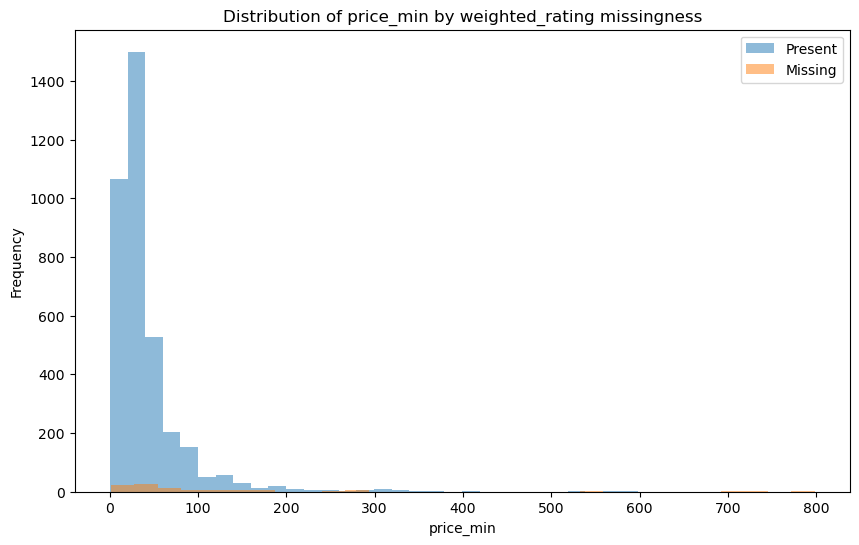

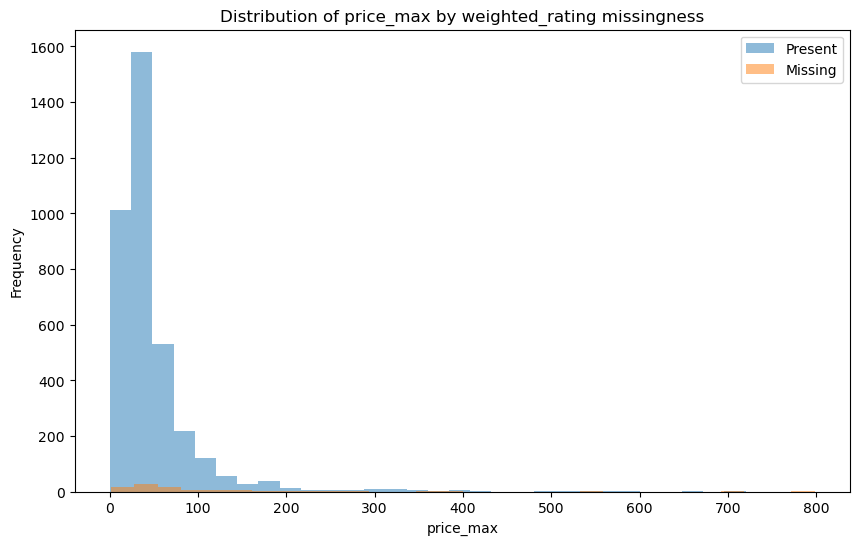

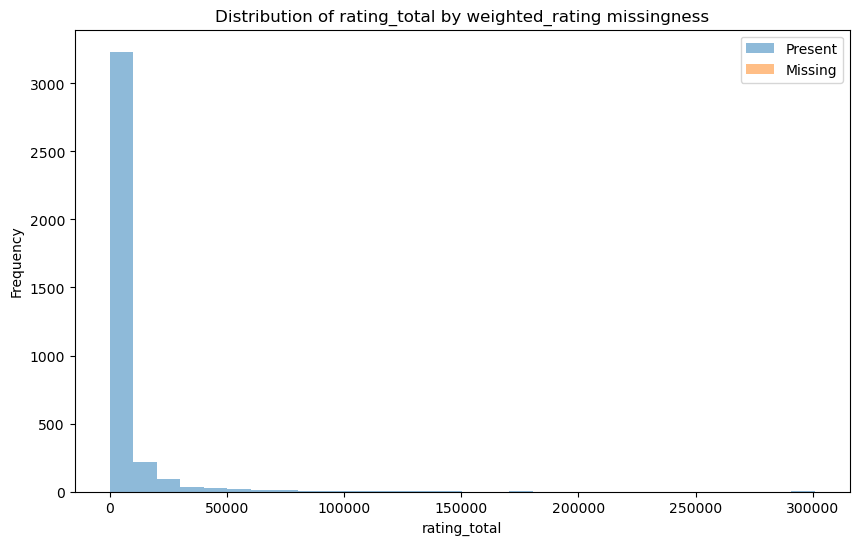

In [27]:
def visualize_distributions_for_mnar_test(df: pd.DataFrame, var: str):
    # Create a column named `{var}_missing` indicating
    # if the weighted_rating of that row is missing or not
    df[f'{var}_missing'] = df[var].isnull()
    
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=np.number)
    
    # Loop over columns in numerical columns
    for column in numerical_columns.columns:
        if column == var:  # Skip the column we're testing
            continue
            
        # Select rows where var is NOT missing (group_missing=False)
        group_not_missing = df[~df[f'{var}_missing']][column]
        
        # Select rows where var IS missing (group_missing=True)
        group_missing = df[df[f'{var}_missing']][column]
        
        # Only plot if we have valid data
        if len(group_missing) > 0 and len(group_not_missing) > 0:
            plt.figure(figsize=(10, 6))
            plt.hist(group_not_missing.dropna(), bins=30, alpha=0.5, label='Present')
            plt.hist(group_missing.dropna(), bins=30, alpha=0.5, label='Missing')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.title(f'Distribution of {column} by {var} missingness')
            plt.legend()
            plt.show()
        
    # Drop the temporary missing indicator column
    df.drop(columns=[f'{var}_missing'], inplace=True)
    
visualize_distributions_for_mnar_test(train_df, 'weighted_rating')

#### Handle Duplicates

In [28]:
# Identify duplicate rows
duplicates = train_df.duplicated()
duplicates.sum()

8

In [29]:
# Remove duplicate rows
train_df = train_df.drop_duplicates()
train_df.shape

(3744, 10)

In [30]:
train_df.head()

,title,price_min,price_max,rating_total,variants,product_about,product_details.Fabric type,product_details.Care instructions,product_details.Origin,weighted_rating
0,THE NORTH FACE Men's Canyonlands Hoodie,99.99,100.00,3,"['Algae Blue Heather', 'Earthen Copper Heather...",ADVENTURE READY. The Men's Canyonlands Hoodie ...,"96% Recycled Polyester, 4% Elastane Fleece",Machine Wash,Imported,4.26
1,Under Armour Men's Fleece Twist Quarter Zip,41.98,60.00,107,"['(001) Black / / Black', '(012) Pitch Gray / ...","Armour Fleece is light, breathable & stretchy ...",100% Polyester,Machine Wash,Imported,4.64
2,"G Gradual Men's Sweatpants Open Bottom, Workou...",25.99,25.99,1869,"['01-black', '01-grey', '02-black', '02-black ...",Mesh Material and Performance: The mens sweatp...,"95% Polyester, 5% Spandex",Machine Wash,Imported,4.31
3,"Elastic Bottom Baggy Sweatpants for Men, Worko...",29.99,29.99,2888,"['Black', 'Charcoal', 'Grey', 'Navy', 'Brown',...",Unbeatable All-Day Comfort - Experience the lu...,100% Polyester,Machine Wash,Imported,4.37
4,"Winterlace 24 Pairs Cotton Crew Socks, Mens Wo...",33.99,33.99,1674,"['Assorted (White/Black/Gray)', 'Black', 'Blac...",COTTON CREW SOCKS : Crafted from a comfortable...,"80% Cotton, 18% Polyester, 2% Spandex",Machine Wash,China,4.16


#### Package Data Cleaning Step into a Function

### Data Transformation

#### Standardize Column Names

In [31]:
train_df.columns

Index(['title', 'price_min', 'price_max', 'rating_total', 'variants',
       'product_about', 'product_details.Fabric type',
       'product_details.Care instructions', 'product_details.Origin',
       'weighted_rating'],
      dtype='object')

In [32]:
def standardize_column_names(col_name: str) -> str:
    # Delete 'product_details.'
    new_name = col_name.replace('product_details.', '')
    
    # Replace '_' with ' '
    new_name = new_name.replace('_', ' ')
    
    # Lowercase column names
    new_name = new_name.lower()
    
    return new_name

new_col_names = [standardize_column_names(col_name) for col_name in train_df.columns]
train_df.columns = new_col_names
train_df.head()

,title,price min,price max,rating total,variants,product about,fabric type,care instructions,origin,weighted rating
0,THE NORTH FACE Men's Canyonlands Hoodie,99.99,100.00,3,"['Algae Blue Heather', 'Earthen Copper Heather...",ADVENTURE READY. The Men's Canyonlands Hoodie ...,"96% Recycled Polyester, 4% Elastane Fleece",Machine Wash,Imported,4.26
1,Under Armour Men's Fleece Twist Quarter Zip,41.98,60.00,107,"['(001) Black / / Black', '(012) Pitch Gray / ...","Armour Fleece is light, breathable & stretchy ...",100% Polyester,Machine Wash,Imported,4.64
2,"G Gradual Men's Sweatpants Open Bottom, Workou...",25.99,25.99,1869,"['01-black', '01-grey', '02-black', '02-black ...",Mesh Material and Performance: The mens sweatp...,"95% Polyester, 5% Spandex",Machine Wash,Imported,4.31
3,"Elastic Bottom Baggy Sweatpants for Men, Worko...",29.99,29.99,2888,"['Black', 'Charcoal', 'Grey', 'Navy', 'Brown',...",Unbeatable All-Day Comfort - Experience the lu...,100% Polyester,Machine Wash,Imported,4.37
4,"Winterlace 24 Pairs Cotton Crew Socks, Mens Wo...",33.99,33.99,1674,"['Assorted (White/Black/Gray)', 'Black', 'Blac...",COTTON CREW SOCKS : Crafted from a comfortable...,"80% Cotton, 18% Polyester, 2% Spandex",Machine Wash,China,4.16


#### Handle Outliers

In [33]:
train_df.head()

,title,price min,price max,rating total,variants,product about,fabric type,care instructions,origin,weighted rating
0,THE NORTH FACE Men's Canyonlands Hoodie,99.99,100.00,3,"['Algae Blue Heather', 'Earthen Copper Heather...",ADVENTURE READY. The Men's Canyonlands Hoodie ...,"96% Recycled Polyester, 4% Elastane Fleece",Machine Wash,Imported,4.26
1,Under Armour Men's Fleece Twist Quarter Zip,41.98,60.00,107,"['(001) Black / / Black', '(012) Pitch Gray / ...","Armour Fleece is light, breathable & stretchy ...",100% Polyester,Machine Wash,Imported,4.64
2,"G Gradual Men's Sweatpants Open Bottom, Workou...",25.99,25.99,1869,"['01-black', '01-grey', '02-black', '02-black ...",Mesh Material and Performance: The mens sweatp...,"95% Polyester, 5% Spandex",Machine Wash,Imported,4.31
3,"Elastic Bottom Baggy Sweatpants for Men, Worko...",29.99,29.99,2888,"['Black', 'Charcoal', 'Grey', 'Navy', 'Brown',...",Unbeatable All-Day Comfort - Experience the lu...,100% Polyester,Machine Wash,Imported,4.37
4,"Winterlace 24 Pairs Cotton Crew Socks, Mens Wo...",33.99,33.99,1674,"['Assorted (White/Black/Gray)', 'Black', 'Blac...",COTTON CREW SOCKS : Crafted from a comfortable...,"80% Cotton, 18% Polyester, 2% Spandex",Machine Wash,China,4.16


In [34]:
# Function to draw boxplot given column name
def draw_boxplot(df, column_name):
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[column_name], vert=False)
    plt.title(f'Boxplot of {column_name}')
    plt.show()

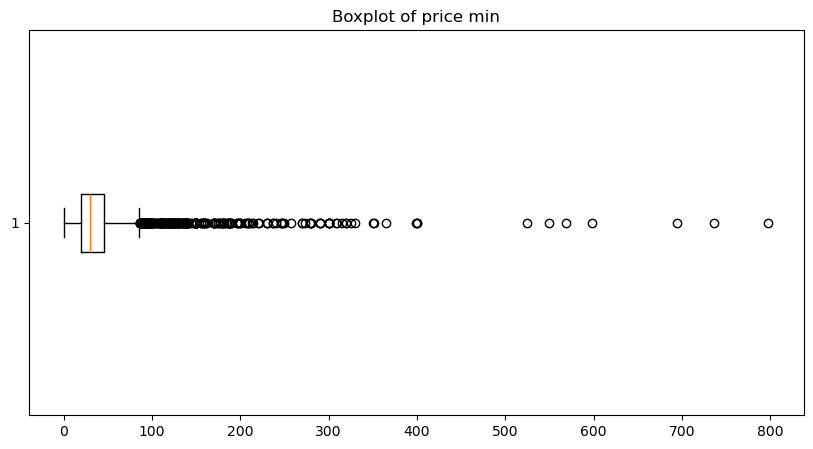

In [35]:
# Draw boxplot for "price min"
draw_boxplot(train_df, 'price min')

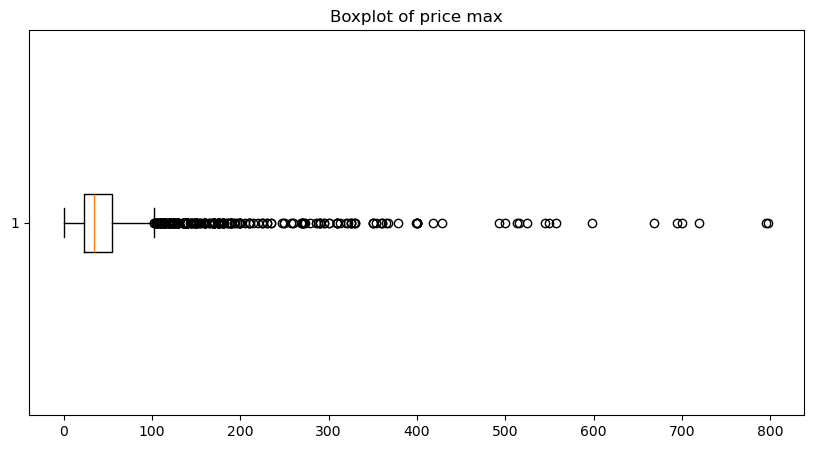

In [36]:
# Draw boxplot for "Price max"
draw_boxplot(train_df, 'price max')

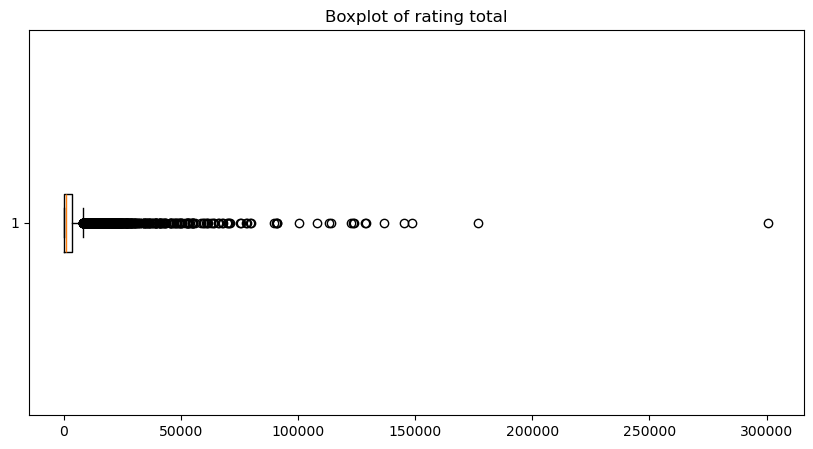

In [37]:
# Draw boxplot for "Rating total"
draw_boxplot(train_df, 'rating total')

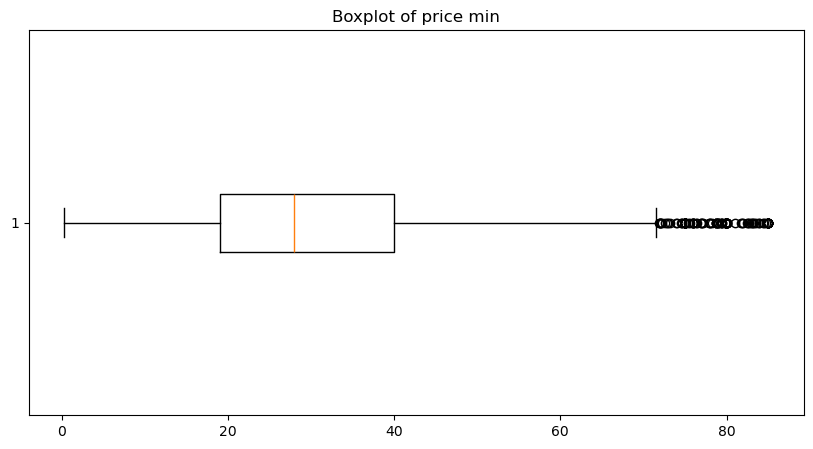

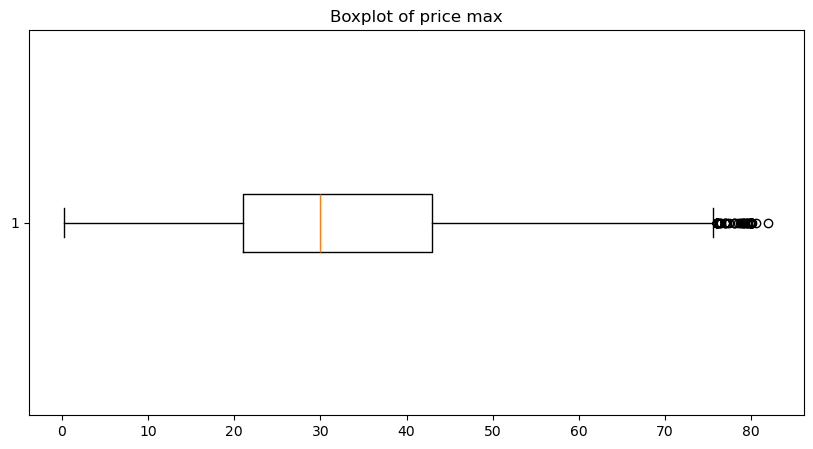

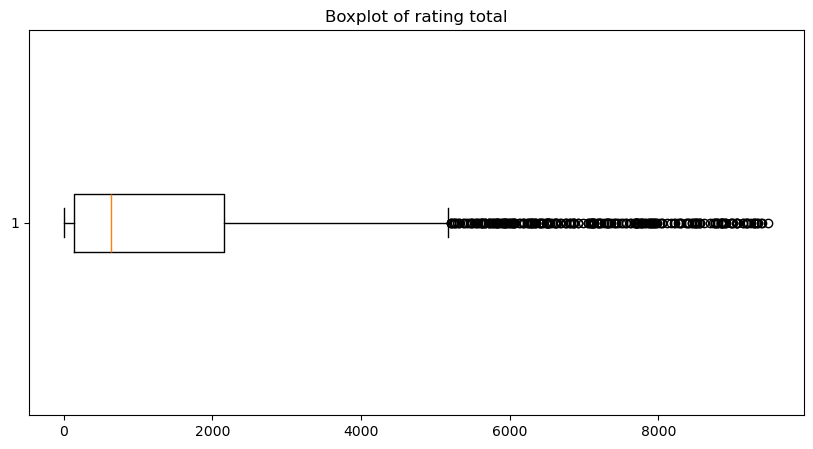

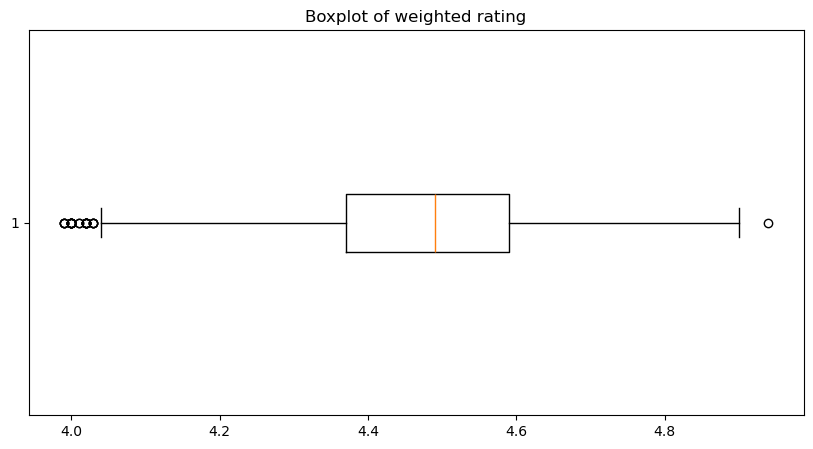

In [38]:
# Iterate over the numerical columns
numerical_columns = ["price min", "price max", "rating total", "weighted rating"]
for column in numerical_columns:
    # Calculate IQR
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows with outliers
    train_df = train_df[(train_df[column] >= lower_bound) & (train_df[column] <= upper_bound)]
    
    # Draw boxplot
    draw_boxplot(train_df, column)

#### Scale and Normalize Data

In [39]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the train data
scaler.fit(train_df[numerical_columns])

# Transform the numerical columns of the train data
numerical_columns_scaled = pd.DataFrame(scaler.transform(train_df[numerical_columns]), columns=numerical_columns)
numerical_columns_scaled.describe()

,price min,price max,rating total,weighted rating
count,2.672000e+03,2.672000e+03,2.672000e+03,2.672000e+03
mean,-2.320167e-16,-2.021005e-16,5.983238e-17,-1.066346e-15
std,1.000187e+00,1.000187e+00,1.000187e+00,1.000187e+00
min,-1.722809e+00,-1.877872e+00,-7.728903e-01,-2.851686e+00
25%,-6.715067e-01,-6.962875e-01,-6.920930e-01,-6.162714e-01
50%,-1.211189e-01,-1.534123e-01,-4.428052e-01,8.964909e-02
75%,5.085382e-01,5.555381e-01,2.902321e-01,6.779162e-01
max,3.038411e+00,2.569676e+00,3.585796e+00,2.736851e+00


In [38]:
train_df.reset_index(drop=True, inplace=True)
# Replace the numerical columns with the scaled values
train_df[numerical_columns] = numerical_columns_scaled
train_df[numerical_columns].describe()

,price min,price max,rating total,weighted rating
count,2.676000e+03,2.676000e+03,2.676000e+03,2.676000e+03
mean,2.150746e-16,-5.576008e-17,1.327621e-18,1.950275e-15
std,1.000187e+00,1.000187e+00,1.000187e+00,1.000187e+00
min,-1.725383e+00,-1.879895e+00,-7.731018e-01,-2.888715e+00
25%,-6.724579e-01,-6.974598e-01,-6.925303e-01,-6.088851e-01
50%,-1.165989e-01,-1.533763e-01,-4.427929e-01,9.260087e-02
75%,5.076173e-01,5.552672e-01,2.888838e-01,7.356297e-01
max,3.039364e+00,2.570855e+00,3.577074e+00,2.723173e+00


### Feature Engineering

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2672 entries, 1 to 3751
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2672 non-null   object 
 1   price min          2672 non-null   float64
 2   price max          2672 non-null   float64
 3   rating total       2672 non-null   int64  
 4   variants           2672 non-null   object 
 5   product about      2672 non-null   object 
 6   fabric type        2672 non-null   object 
 7   care instructions  2672 non-null   object 
 8   origin             2672 non-null   object 
 9   weighted rating    2672 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 229.6+ KB


#### One-hot encoding for care instructions: machine washable?

In [41]:
train_df['care instructions'] = train_df['care instructions'].apply(lambda x: x.lower())
train_df['machine wash'] = train_df['care instructions'].apply(lambda x: 1 if 'machine wash' in x else 0)
train_df.drop(columns=['care instructions'], inplace=True)

#### One-hot encoding for origin: made in usa, imported or unknown?

In [42]:
train_df['origin'] = train_df['origin'].apply(lambda x: x.lower())
train_df['origin usa'] = train_df['origin'].apply(lambda x: 1 if 'us' in x else 0)
train_df['origin imported'] = train_df['origin'].apply(lambda x: 1 if 'import' in x else 0)
train_df['origin unknown'] = train_df['origin'].apply(lambda x: 1 if 'us' not in x and 'import' not in x else 0)
train_df.drop(columns=['origin'], inplace=True)

#### One-hot encoding for colors

If there is a variant with a color, the feature is set to 1, otherwise 0.

In [43]:
import re

train_df['variants'] = train_df['variants'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x.lower()))

all_colors = ['beige', 'black', 'blue', 'brown', 'gold', 'gray', 'green', 'grey', 
              'khaki', 'navy', 'orange', 'pink', 'purple', 'red', 'silver', 'white', 'yellow']

for color in all_colors:
    train_df[f'color {color}'] = train_df['variants'].apply(lambda x: 1 if color in x else 0)

train_df.drop(columns=['variants'], inplace=True)

#### Encoding fabric type

In [45]:
# Concate all fabric types into a single string
fabric_types = train_df['fabric type'].str.cat(sep=', ')
fabric_types

# Lowercase the string
fabric_types = fabric_types.lower()

# Delete all number characters in the string
fabric_types = ''.join([i for i in fabric_types if not i.isdigit()])
fabric_types

# Replace all special characters commas, and whitespaces with a single whitespace
fabric_types = ' '.join(fabric_types.split())
fabric_types

# Replace all % with commas
fabric_types = fabric_types.replace('%', ',')
fabric_types

# Split the string into a list of fabric types
fabric_types = fabric_types.split(',')
fabric_types

# Remove spaces at the beginning and end of each fabric type
fabric_types = [fabric_type.strip() for fabric_type in fabric_types]
fabric_types

# Count the frequency of each fabric type
fabric_type_counts = pd.Series(fabric_types).value_counts().to_frame()
fabric_type_counts

# Export the fabric type counts to a CSV file
fabric_type_counts.to_csv("fabric_type_counts.csv")

In [46]:
fabrics = [
    "acrylic",
    "alpaca wool",
    "bamboo viscose",    # includes “rayon derived/made from bamboo”
    "body",              # appears in a “fabric” context, though vague
    "combed cotton",
    "coolmax polyester",
    "coral fleece",
    "cotton",
    "cotton/polyester",
    "denim",
    "elastane",          # includes “lycra elastane”
    "eva",
    "faux fur",
    "faux leather",
    "flannel",
    "fleece",            # includes variants like “french terry fleece”, “everest fleece”
    "knit",              # “knit fabric” or “knitted”
    "linen",
    "lycra",
    "merino wool",       # also appears in “merino wool/nylon/elastane”
    "mesh",
    "modal",
    "mulberry silk",     # includes references like “natural mulberry silk”
    "nylon",
    "olefin",
    "organic cotton",
    "performance cotton",
    "plush",
    "poly",              # sometimes shorthand for polyester
    "polyamide",
    "polybutylene terephthalate",  # PBT
    "polyester",         # includes “recycled polyester”, “polyester/spandex”
    "polypropylene",
    "polyurethane",      # often appears as PU
    "pvc",
    "rayon",             # includes “rayon made/derived from bamboo”
    "rubber",
    "satin",             # includes “silky satin”
    "sheep’s wool",
    "sherpa-velour",
    "silk",
    "silky polyester",
    "spandex",           # includes references like “spandex hacci jersey”
    "tencel lyocell",
    "textile",           # sometimes just “textile synthetics”
    "tri blend",
    "velour",
    "velvet",
    "viscose",           # includes “viscose made from bamboo”
    "wicking fabric",
    "wool"
]

In [47]:
train_df['fabric type'] = train_df['fabric type'].apply(lambda x: x.lower())

In [48]:
def extract_percentage(x, fabric):
    if fabric not in x:
        return 0.0
    # Position of fabric in the string
    fabric_position = x.find(fabric)
    # Find all percentages in the string (allowing for both decimal and integer numbers)
    percentages = re.findall(r'(\d+\.?\d*)[%]', x[:fabric_position])
    if percentages:
        return float(percentages[-1]) / 100
    return 0.0

for fabric in fabrics:
    train_df[f'fabric {fabric}'] = train_df['fabric type'].apply(lambda x: extract_percentage(x, fabric))

train_df.drop(columns=['fabric type'], inplace=True)